# Color Space Test
https://en.wikipedia.org/wiki/HSL_and_HSV#Lightness

- Grayscale: Intensity is defined as the arithmetic mean of RGB channels
- Lightness channel of HLS : Lightness is defined as the average of the largest and smallest color components
- Value channel of HSV : Value is defined as the largest component of a color

In [1]:
import random
import numpy
from datetime import datetime
from src.data.ParkingProvider import NoSpacesException, NoImageException
from src.metrics.PerformanceMetricsProviderSklearn import PerformanceMetricsProviderSklearn
from src.metrics.entity.PerformanceMetrics import PerformanceMetrics
from src.detector.entity.DetectionParams import DetectionParams
from src.data.ParkingProviderLocal import ParkingProviderLocalParams
from src.app.ParkingOccupancyProcessorLocal import ParkingOccupancyProcessorLocal
import cv2 as cv

metrics_list = list()
row_names = list()

def test_channel(channel, row_name, detection_params:DetectionParams, provider_params):
    detection_params.channel = channel
    metrics_provider: PerformanceMetricsProviderSklearn = PerformanceMetricsProviderSklearn()

    processor = ParkingOccupancyProcessorLocal(
        parking_provider_params=provider_params, detection_params=detection_params, performance_metrics_provider=metrics_provider)

    try:
        processor.process_batch()
    except (NoSpacesException, NoImageException) as ex:
        print(f"Finished processing samples: ", ex)

        
    metrics_provider.calculate_metrics()
    metrics_provider.show_confusion_matrix()

    metrics_list.append(metrics_provider.metrics)
    row_names.append(row_name)
    
def test_parking(parking_id, detection_params:DetectionParams): 
    
    # Fixed seed to get the same files selected
    provider_params = ParkingProviderLocalParams(
    parking_id=parking_id, path='E:\\Documents\\PKLot\\PKLot\\PKLot\\PKLot\\'+parking_id, k=25, random_seed=datetime.now().timestamp())
    
    test_channel('g', f"{str(parking_id)} channel 'G'ray", detection_params, provider_params)
    test_channel('l', f"{str(parking_id)} channel HS'L'", detection_params, provider_params)
    test_channel('v', f"{str(parking_id)} channel HS'V'", detection_params, provider_params)


## UFPR04

Selected 151 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Sunny\2012-12-08\2012-12-08_11_40_07.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Rainy\2012-12-14\2012-12-14_08_40_03.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Sunny\2012-12-17\2012-12-17_14_45_11.jpg
Processing 151 files with 16 cores


100%|██████████| 151/151 [00:24<00:00,  6.22it/s]


Precision: 0.840
specificity: 0.847
Recall: 0.673
F1 Score: 0.747
Accuracy: 0.752


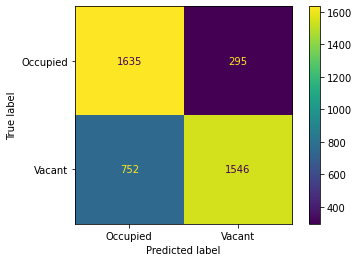

Selected 151 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Sunny\2012-12-08\2012-12-08_11_40_07.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Rainy\2012-12-14\2012-12-14_08_40_03.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Sunny\2012-12-17\2012-12-17_14_45_11.jpg
Processing 151 files with 16 cores


100%|██████████| 151/151 [00:25<00:00,  5.91it/s]

Precision: 0.873
specificity: 0.885
Recall: 0.707
F1 Score: 0.781
Accuracy: 0.791


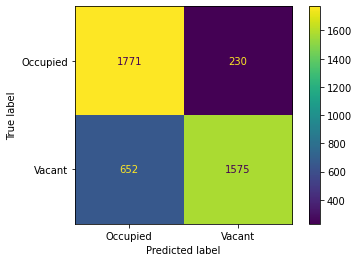

Selected 151 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Sunny\2012-12-08\2012-12-08_11_40_07.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Rainy\2012-12-14\2012-12-14_08_40_03.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR04\Sunny\2012-12-17\2012-12-17_14_45_11.jpg
Processing 151 files with 16 cores


100%|██████████| 151/151 [00:24<00:00,  6.12it/s]

Precision: 0.888
specificity: 0.870
Recall: 0.618
F1 Score: 0.729
Accuracy: 0.713


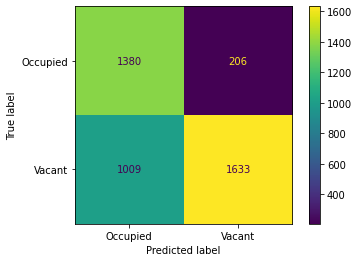

In [2]:
#Define global params for each parking
PARAMS_UFPR04 = DetectionParams((5, 5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 29, 8, 3, 23, vacant_threshold=0.28)  # UFPR04
test_parking('UFPR04', PARAMS_UFPR04)

## UFPR05

Selected 166 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-04-15\2013-04-15_06_55_01.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-03-10\2013-03-10_10_10_04.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-02-22\2013-02-22_16_05_10.jpg
Processing 166 files with 16 cores


100%|██████████| 166/166 [00:29<00:00,  5.69it/s]


Precision: 0.705
specificity: 0.647
Recall: 0.913
F1 Score: 0.795
Accuracy: 0.775


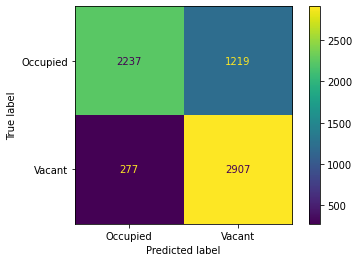

Selected 166 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-04-15\2013-04-15_06_55_01.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-03-10\2013-03-10_10_10_04.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-02-22\2013-02-22_16_05_10.jpg
Processing 166 files with 16 cores


100%|██████████| 166/166 [00:27<00:00,  6.02it/s]

Precision: 0.775
specificity: 0.689
Recall: 0.960
F1 Score: 0.858
Accuracy: 0.832


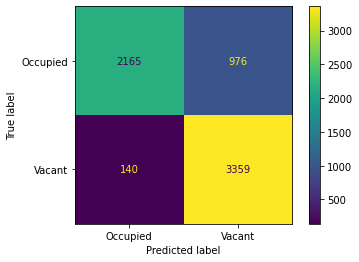

Selected 166 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-04-15\2013-04-15_06_55_01.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-03-10\2013-03-10_10_10_04.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\UFPR05\Sunny\2013-02-22\2013-02-22_16_05_10.jpg
Processing 166 files with 16 cores


100%|██████████| 166/166 [00:29<00:00,  5.60it/s]


Precision: 0.723
specificity: 0.709
Recall: 0.903
F1 Score: 0.803
Accuracy: 0.798


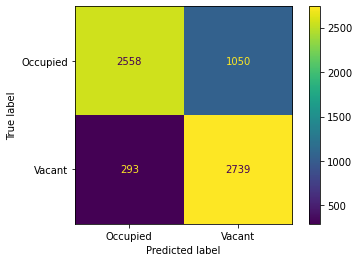

In [3]:
PARAMS_UFPR05 =  DetectionParams((5,5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 33, 9, 3, 305,vacant_threshold=0.24) # UPR05

test_parking('UFPR05', PARAMS_UFPR05)

## PUCPR

Selected 178 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Sunny\2012-09-18\2012-09-18_13_20_06.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Sunny\2012-09-15\2012-09-15_13_52_18.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Cloudy\2012-10-31\2012-10-31_09_43_08.jpg
Processing 178 files with 16 cores


100%|██████████| 178/178 [00:44<00:00,  4.02it/s]

Precision: 0.826
specificity: 0.872
Recall: 0.821
F1 Score: 0.824
Accuracy: 0.851


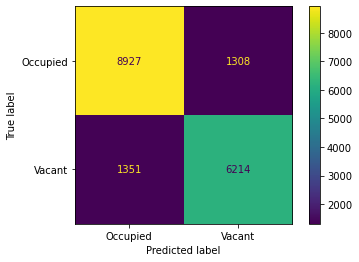

Selected 178 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Sunny\2012-09-18\2012-09-18_13_20_06.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Sunny\2012-09-15\2012-09-15_13_52_18.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Cloudy\2012-10-31\2012-10-31_09_43_08.jpg
Processing 178 files with 16 cores


100%|██████████| 178/178 [00:45<00:00,  3.93it/s]

Precision: 0.855
specificity: 0.871
Recall: 0.709
F1 Score: 0.775
Accuracy: 0.788


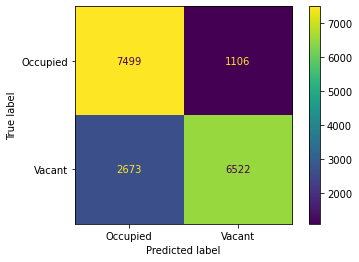

Selected 178 files:

E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Sunny\2012-09-18\2012-09-18_13_20_06.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Sunny\2012-09-15\2012-09-15_13_52_18.jpg
E:\Documents\PKLot\PKLot\PKLot\PKLot\PUCPR\Cloudy\2012-10-31\2012-10-31_09_43_08.jpg
Processing 178 files with 16 cores


100%|██████████| 178/178 [00:46<00:00,  3.80it/s]

Precision: 0.930
specificity: 0.907
Recall: 0.847
F1 Score: 0.886
Accuracy: 0.871


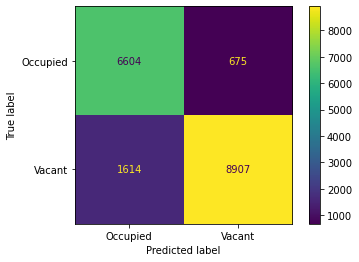

In [4]:
PARAMS_PUCPR = DetectionParams((5,5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 27, 7, 3, 85, vacant_threshold=0.26) # PUCPR

test_parking('PUCPR', PARAMS_PUCPR)

# Total results

In [5]:
PerformanceMetricsProviderSklearn.show_dataframe(metrics_list, row_names)

                       precision  specificity  recall     f1  accuracy
UFPR04 channel 'G'ray      0.840        0.847   0.673  0.747     0.752
UFPR04 channel HS'L'       0.873        0.885   0.707  0.781     0.791
UFPR04 channel HS'V'       0.888        0.870   0.618  0.729     0.713
UFPR05 channel 'G'ray      0.705        0.647   0.913  0.795     0.775
UFPR05 channel HS'L'       0.775        0.689   0.960  0.858     0.832
UFPR05 channel HS'V'       0.723        0.709   0.903  0.803     0.798
PUCPR channel 'G'ray       0.826        0.872   0.821  0.824     0.851
PUCPR channel HS'L'        0.855        0.871   0.709  0.775     0.788
PUCPR channel HS'V'        0.930        0.907   0.847  0.886     0.871
